In [150]:
import pandas as pd
import seaborn as sns
import numpy as np


In [151]:
# Description of Dataset
# The dataset contains data Dataset includes info about real estate objects in Moscow. 
#The following are a discription of the data
# The data is from www.kaggle.com, the url is https://www.kaggle.com/timmofeyy/realestaterent

# "metro": The nearest metro stationto to the apartment.
# "price": The rent price for the apartment.
#"way": A way to reach metro station (on foot or by public transport)
#"views": The number of views for each apartment.
#"provider": A person or agency who is renting apartment.
#"fee_percent": Fee percent of an agency or realtor
#"storey": tThe storey, where the apartment located.
#"minutes": Minutes quantity to reach metro station
#"storey": The total number of storeys in a building.



In [152]:
data = pd.read_csv('move.csv')

In [153]:
#Exploratory Data Analysis
#There is no noll value in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1446 non-null   int64 
 1   metro         1446 non-null   object
 2   price         1446 non-null   int64 
 3   way           1446 non-null   object
 4   views         1446 non-null   int64 
 5   provider      1446 non-null   object
 6   fee_percent   1446 non-null   int64 
 7   storey        1446 non-null   int64 
 8   minutes       1446 non-null   int64 
 9   storeys       1446 non-null   int64 
 10  living_area   1446 non-null   int64 
 11  kitchen_area  1446 non-null   int64 
 12  total_area    1446 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 147.0+ KB


In [154]:
# The following are plans for data exploration
#1. A visual exploration
#2. Checking for null values
#3. Checking and dealing with outliers
#4. Checking and fixing typographical errors and also transalation issues

#5. 
data.head()

,Unnamed: 0,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [155]:
data_raw = data.copy()
# This removes the unmaned column
data.drop(data.columns[data.columns.str.contains('Unnamed', case = False)], axis = 1, inplace = True)
data.head()


,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [157]:
# A description of the data to look for outliers
data.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


<AxesSubplot:>

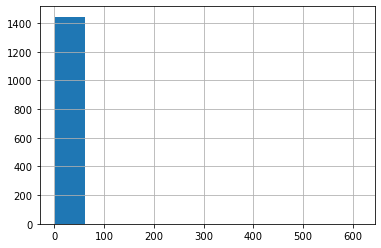

In [156]:
# A summary statistics may reveal some outliers. There are outliers in storey and storeys column. 
#Any storey or storeys value greater than 35  will be dropped
# Let us plot a histogram for storey and storeys
data['storey'].hist()


In [114]:
data = data.loc[data['storey'] <= 35,:]
data = data.loc[data['storeys'] <= 35,:]
#Two rows of data were removed

In [158]:
# Let me check the unique values while looking for error in spellings

data.nunique()

metro           119
price            62
way               2
views            93
provider          7
fee_percent      16
storey           29
minutes          27
storeys          36
living_area      25
kitchen_area     18
total_area       36
dtype: int64

In [116]:
# For each column, I will then look at the unique values
data['metro'].unique()


array([' Planernaia ', ' VDNKh ', ' Alekseevskaia ', ' Sviblovo ',
       ' Rimskaia ', ' Perovo ', ' Nekrasovka ', ' Riazanskii prospekt ',
       ' Medvedkovo ', ' Khovrino ', ' Okskaia ', ' Vystavochnaia ',
       ' Otradnoe ', ' Kuntcevskaia ', ' Shabolovskaia ',
       ' Dobryninskaia ', ' Paveletckaia ', ' Altufevo ', ' Tcaritcyno ',
       ' Shchelkovskaia ', ' Skhodnenskaia ', ' Solntcevo ',
       ' Ulitca Starokachalovskaia ', ' Zhulebino ',
       ' Preobrazhenskaia ploshchad ', ' Rasskazovka ',
       ' Buninskaia Alleia ', ' Fili ', ' Kommunarka ',
       ' Lukhmanovskaia ', ' Teplyi Stan ', ' Prazhskaia ',
       ' Filatov Lug ', ' Annino ', ' Beliaevo ', ' Liublino ',
       ' Kuzminki ', ' Novye Cheremushki ', ' Marino ', ' Strogino ',
       ' Salarevo ', ' Piatnitckoe shosse ', ' Izmailovskaia ',
       ' Petrovsko-Razumovskaia ', ' Tekstilshchiki ', ' Novokosino ',
       ' Ulitca Dmitrievskogo ', ' Nagornaia ', ' Dubrovka ',
       ' Partizanskaia ', ' Bulvar Rokoss

In [159]:
#Everthing seems fine, apart from a value named --No Data--, this will be deleted
data.drop(data.index[(data["metro"] == "No data")],axis=0,inplace=True)

In [160]:
data['provider'].unique()
# These reveals some typo and also some russian spellings

array(['realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'agency                 ', 'agency                \xa0 \xa0 ',
       'Застройщик                 '], dtype=object)

In [161]:
data['provider']= data.provider.str.replace('realtor                \xa0 \xa0','relator')
data['provider']= data.provider.str.replace('realtor                 ','relator')
data['provider']= data.provider.str.replace('agency                \xa0 \xa0\xa0 \xa0 ','agency')
data['provider']= data.provider.str.replace('agency                 ','agency')
data['provider']= data.provider.str.replace('Застройщик                 ','developer')
data['provider']= data.provider.str.replace('relator ','relator')
data['provider']= data.provider.str.replace('agency                \xa0 \xa0 ','agency')
data['provider']= data.provider.str.replace('owner                 ','owner')
data['provider'].unique()

array(['relator', 'owner', 'agency', 'developer'], dtype=object)

In [162]:
# A visual inspection for typo in way column, everything looks fine
data['way'].unique()

array(['walk', 'transport'], dtype=object)

In [163]:
# Separate features from target
price = data['price'].copy()
var_data = data.drop(columns=['price'])
var_data.head()

,metro,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,walk,513,relator,50,7,10,12,19,8,38
1,VDNKh,walk,389,relator,50,16,10,16,18,8,41
2,Alekseevskaia,walk,483,relator,50,5,3,12,19,5,33
3,Sviblovo,walk,414,relator,50,3,15,5,37,37,37
4,Rimskaia,walk,360,relator,99,6,7,17,21,10,40


In [164]:
# For feature engineering
#1. I adjusted the value for skew, that is using log to transform them into a normal distribution
#2. I aslo converted non categorical variable to variables by using dummy variables

# Checking for skew
num_data = var_data.select_dtypes('number').columns
skew_limit = 0.75
skew_vals = var_data[num_data].skew()
skew_vals

views            4.060967
fee_percent      0.053198
storey          33.988690
minutes          1.161365
storeys         37.518854
living_area      1.749263
kitchen_area     2.592403
total_area      -0.644455
dtype: float64

In [165]:
#Filter out skew columns
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=True)
ss = skew_cols


In [166]:
#Applying log transformation
tran_var_data = var_data
for col in ss.index.values:
    tran_var_data[col] = tran_var_data[col].apply(np.log1p)
    


<AxesSubplot:>

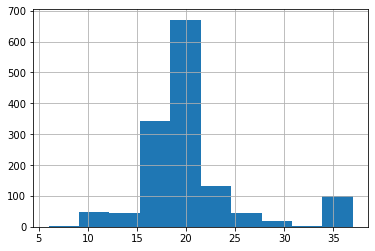

In [169]:
# Let us look at living_area before and after transformation
# Before transformation
data['living_area'].hist()

<AxesSubplot:>

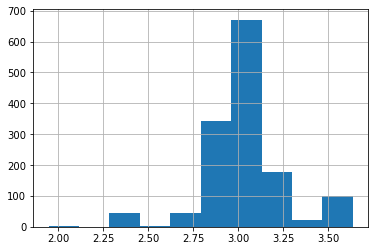

In [170]:
#After transformation
tran_var_data['living_area'].hist()

In [125]:
# Creating dummy variables for the non numeric colum
metro_dummy = pd.get_dummies(data.metro)
way_dummy = pd.get_dummies(data.way)
provider_dummy= pd.get_dummies(data.provider)

#Merging dummy variables with transformed data

merged = pd.concat([tran_var_data,metro_dummy,way_dummy,provider_dummy], axis = 'columns')

In [134]:
merged.head()
# A visual view of the data

,metro,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,...,Volzhskaia,Vystavochnaia,Zhulebino,Ziablikovo,transport,walk,agency,developer,owner,relator
0,Planernaia,walk,6.242223,relator,50,2.079442,2.397895,2.564949,2.995732,2.197225,...,0,0,0,0,0,1,0,0,0,1
1,VDNKh,walk,5.966147,relator,50,2.833213,2.397895,2.833213,2.944439,2.197225,...,0,0,0,0,0,1,0,0,0,1
2,Alekseevskaia,walk,6.182085,relator,50,1.791759,1.386294,2.564949,2.995732,1.791759,...,0,0,0,0,0,1,0,0,0,1
3,Sviblovo,walk,6.028279,relator,50,1.386294,2.772589,1.791759,3.637586,3.637586,...,0,0,0,0,0,1,0,0,0,1
4,Rimskaia,walk,5.888878,relator,99,1.945910,2.079442,2.890372,3.091042,2.397895,...,0,0,0,0,0,1,0,0,0,1


In [142]:
#Dropping categorical data 
aa = merged
final = aa.drop(['metro','way','provider'], axis = 'columns')


In [171]:
# Formulating three hypothesis for this data
#1. The price of a house is normally distributed
#2. There is a correlation between the price of a house and the space of the living area
#3. There is a 50% chance that the provider is a relator

# I will test hypothesis 1

#First let me start with a plot


<AxesSubplot:>

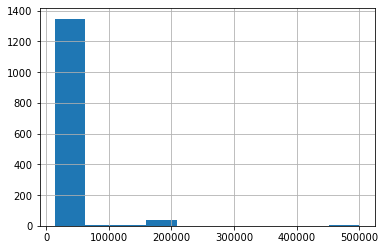

In [147]:
price.hist()

In [149]:
# A plot shows that the distribution is not normal. For futher testing I will do a normality testing

from scipy.stats import normaltest
stat, p = normaltest(price)
print('stat = %.10f, p = %.10f' %(stat,p))

# The cut off is 0.05
if p > 0.05:
    print ('Normal')
else:
    print ('Not normally distrubted')



stat = 1712.4456333485, p = 0.0000000000
Not normally distrubted


In [ ]:
# Suggestion for next steps
#1. A ploynomial transformation could be checked and applied to the variables
#2. The data could be split, one for training and the other for testing

#Summary of the quality of the data
# The data is relatively small, it looks like some form of cleaning has been done. There were no null values.
# Additional data could be provided by collecting more recent data and also getting data from other cities